## Problem Set 3 (Part 1 of 2): Interacting with the Alpha Vantage API using Python libraries

As automation and algorithms continue to disrupt the investment managmentment business, it is important to know how to access finacial data that is realtime and interactive. In this problem set we will access the Alpha Vantage API to build datasets of recent stock performance. Alpha Vantage is a provider of free APIs for realtime and historical data on stocks, forex, and cryptocurrencies.

This part of the exercise demonstrates:

1. Setting up a programming environment to work with APIs
2. Interpreting documentation to change parameters
3. Using the 'requests' library to make HTTP requests
4. Getting data through HTTP requests
5. Using the 'alpha_vantage' library to access the API and format the data
6. Creating an Excel file from the data

Documentation links:
<br />Alpha Vantage: https://www.alphavantage.co/documentation/
<br />Alpha Vantage Python library: https://alpha-vantage.readthedocs.io/en/latest/#
<br />Requests library: https://2.python-requests.org/en/master/
<br />Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

______

#### Get API key

Go to https://www.alphavantage.co/support/#api-key and obtain an API key. Copy this key into the "api_key" variable in the next cell:

In [2]:
api_key = "K2EKTJDKW4WL0ZME"

Assign a stock ticker symbol of your choosing to the 'ticker' variable:

In [3]:
ticker = "FB"

Import the appropriate libraries in the lines below each comment:

In [4]:
# pandas
import pandas as pd
# requests 
import requests
# alpha_vantage TimeSeries class 
from alpha_vantage.timeseries import TimeSeries 
# matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#### Access API through an HTTP request

Assign the API url to the variable "link".
<br />(refer to the Alpha Vantage documention)
<br />
<br />Format the url string to include the "api_key" variable and the "ticker" variable Reassign the url u

In [5]:
link = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=5min&apikey={api_key}"
print(link)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=FB&interval=5min&apikey=K2EKTJDKW4WL0ZME


Refer to the requests documentation to set up a get request to the above url. Assign the output to a new variable, preferably your ticket symbol. 

In [5]:
fb = requests.get(link)

Print the HTTP response:

In [6]:
print(fb)

<Response [200]>


Print the data:

In [8]:
print(fb.text)

NameError: name 'fb' is not defined

______

#### Access the API through the alpha_vantage libray

Create an instance of the TimeSeries class imported earlier. Assign your API key to the key argument. Use "pandas" as an output format.

In [9]:
ts = TimeSeries(key=api_key,output_format="pandas")

Use the get_intraday method to access API data. Get the last 100 observations of data for your ticker symbol at 1-minute intervals:

In [12]:
data, meta_data = ts.get_intraday(symbol=ticker ,interval='1min', outputsize='compact')

Print the data:

In [13]:
print(data)

                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2019-09-23 14:21:00  186.7100  186.7600  186.6800  186.7000    16144.0
2019-09-23 14:22:00  186.6877  186.6877  186.5400  186.5784    19527.0
2019-09-23 14:23:00  186.5700  186.6400  186.5110  186.6100    16209.0
2019-09-23 14:24:00  186.6200  186.6899  186.6200  186.6600     9674.0
2019-09-23 14:25:00  186.6650  186.6800  186.5900  186.5900     5322.0
2019-09-23 14:26:00  186.5800  186.6500  186.5700  186.5887     8774.0
2019-09-23 14:27:00  186.5700  186.5700  186.5100  186.5237    10087.0
2019-09-23 14:28:00  186.5265  186.5533  186.5100  186.5100     8284.0
2019-09-23 14:29:00  186.5200  186.5200  186.4700  186.4700    10568.0
2019-09-23 14:30:00  186.4700  186.5500  186.4300  186.5400    20332.0
2019-09-23 14:31:00  186.5300  186.5400  186.5200  186.5316     3076.0
2019-09-23 14:32:00  186.5300  186.5300  186.4500  186.4500    27280.0
2019-0

Plot one column of the time series data with the ticket symbol as the title of the graph.
<br />(refer to prior problem set examples)

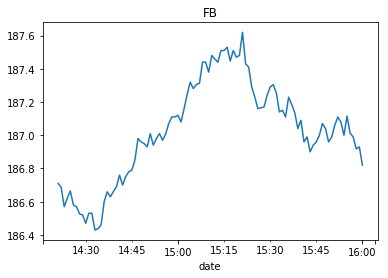

In [16]:
data['1. open'].plot()
plt.title(ticker)
plt.show()

______

#### Export intraday data to Excel file

Refer to the pandas.DataFrame documentation and create an Excel file that includes your time series data of your stock price:

In [20]:
data.to_excel('my_fb_stock_data.xlsx')